In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read data
info = pd.read_csv('../data sourses/Kaggle/indexInfo.csv')
df_processed = pd.read_csv('../data sourses/Kaggle/indexProcessed.csv')
df_processed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [3]:
df_processed.describe()

,Open,High,Low,Close,Adj Close,Volume,CloseUSD
count,104224.000000,104224.000000,104224.000000,104224.000000,104224.000000,1.042240e+05,104224.000000
mean,8015.353334,8063.324234,7962.581120,8014.366642,8014.161269,1.347646e+09,3046.729177
std,9140.563404,9196.575802,9082.767802,9140.609758,9140.720456,4.427662e+09,3747.865623
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00,10.204900
25%,2046.887756,2057.213990,2037.185943,2047.506470,2047.358490,0.000000e+00,320.460898
50%,5772.140137,5812.764892,5725.199951,5773.710205,5773.710205,9.529000e+05,1371.598486
75%,10487.377445,10552.179690,10416.092287,10488.622560,10488.622560,2.064676e+08,4383.045241
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10,18934.376173


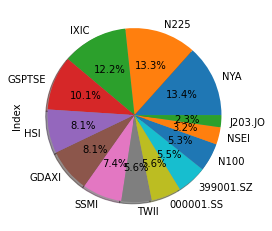

In [4]:
df_processed.Index.value_counts(normalize=True).plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

In [5]:
rates = {}
df_processed['Exchange_Rate'] = df_processed.Close / df_processed.CloseUSD
for x in info.Index.tolist():
    values = df_processed[df_processed.Index == x].Exchange_Rate.values
    name = '{}_USD'.format(info[info.Index == x].Currency.values[0])
    if name not in rates:
        if len(values) > 0:
            rates[name] = values[0]
            print('{0}:{1}'.format(name, float(values[0])))
    else:
        pass

USD_USD:1.0
HKD_USD:7.692307692307692
CNY_USD:6.249999999999999
JPY_USD:100.0
EUR_USD:0.819672131147541
CAD_USD:1.2048192771084336
INR_USD:99.99999999999999
CHF_USD:0.9009009009009008
TWD_USD:25.0
ZAR_USD:14.285714285714288


In [6]:
df_processed['OpenUSD'] = df_processed.Open*df_processed.Exchange_Rate
df_processed['HighUSD'] = df_processed.High*df_processed.Exchange_Rate
df_processed['LowUSD'] = df_processed.Low*df_processed.Exchange_Rate

<AxesSubplot:xlabel='OpenUSD', ylabel='Region'>

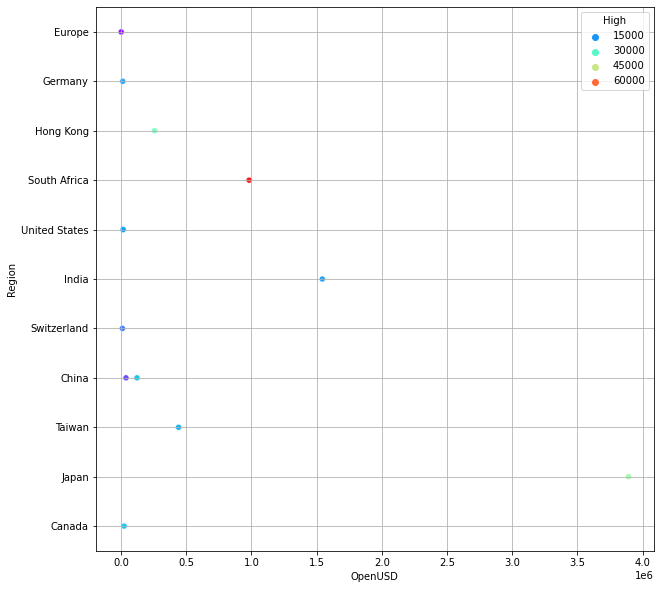

In [7]:
mdf=pd.merge(df_processed, info,on="Index",how="inner")
g=mdf.groupby("Exchange")
plt.figure(figsize=(10,10))
plt.grid()
sns.scatterplot(x="OpenUSD",y="Region",data=g.max(),hue="High",palette="rainbow",alpha=0.9)

C:\Users\10261\AppData\Local\Temp/ipykernel_19900/2063092457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k["Date"]=pd.to_datetime(k["Date"],format='%Y-%m-%d', errors='ignore')


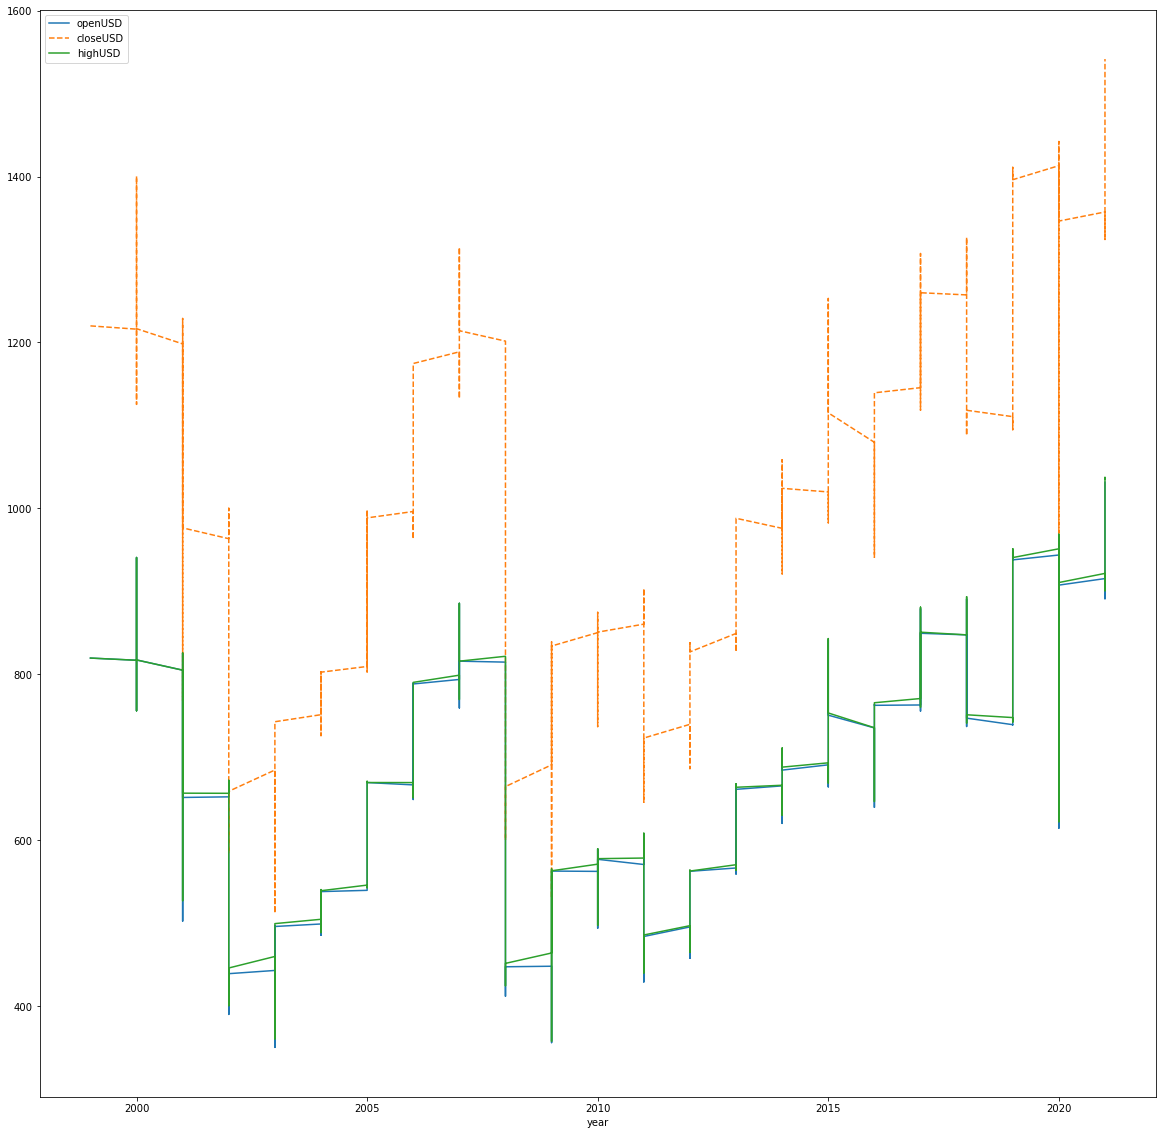

In [8]:
k=g.get_group("Euronext")
k["Date"]=pd.to_datetime(k["Date"],format='%Y-%m-%d', errors='ignore')

plt.figure(figsize=(20,20))
plt.xlabel("year")
x=k["Date"].dt.year
plt.plot(x,"OpenUSD",data=k,label="openUSD")
plt.plot(x,"CloseUSD",data=k,ls="dashed",label="closeUSD")
plt.plot(x,"HighUSD",data=k,label="highUSD")
plt.plot()
plt.legend()

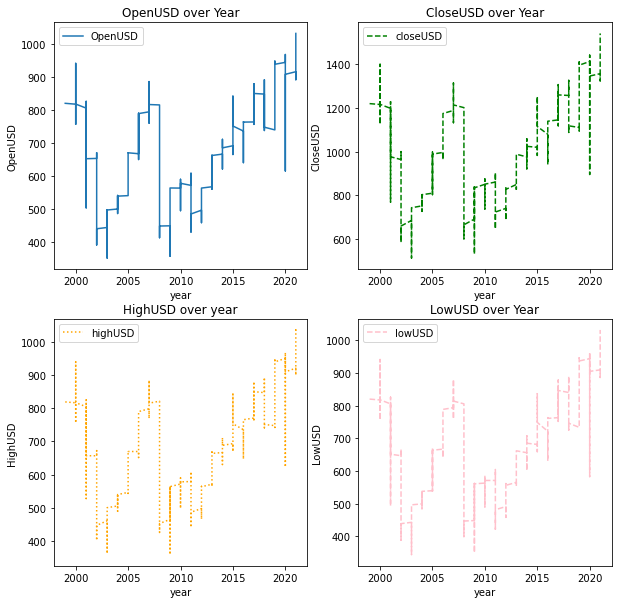

In [9]:
x=k["Date"].dt.year
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(x,"OpenUSD",data=k,label="OpenUSD")
plt.legend()
plt.xlabel("year")
plt.ylabel("OpenUSD")
plt.title("OpenUSD over Year")
plt.subplot(2,2,2)
plt.plot(x,"CloseUSD",data=k,ls="dashed",label="closeUSD",color="green")
plt.legend()
plt.xlabel("year")
plt.ylabel("CloseUSD")
plt.title("CloseUSD over Year")
plt.subplot(2,2,3)
plt.plot(x,"HighUSD",data=k,ls="dotted",label="highUSD",color="orange")
plt.xlabel("year")
plt.ylabel("HighUSD")
plt.title("HighUSD over year")
plt.legend()
plt.subplot(2,2,4)
plt.plot(x,"LowUSD",data=k,ls="--",label="lowUSD",color="pink")
plt.xlabel("year")
plt.ylabel("LowUSD")
plt.title("LowUSD over Year")

plt.legend()